# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.  

Нам предстоит изучить:  
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

***Проект выполнен на платформе Яндекс-Практикум, Вяжевым Даниилом Юрьевичом от 23.04.2022***

# Оглавление

<a id='content'></a>
**[Шаг 1. Загрузим данные и подготовим их к анализу](#part_1)**  
* [Положим данные о визитах, заказах и рекламных тратах в переменные](#part_1.1) 
* [Подготовим данные к анализу. Убедимся, что тип данных во всех колонках соответствует значениям. Проверим отсутствие дубликатов.](#part_1.2) 
* [Вывод](#part_1.3)  

**[Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии](#part_2)**  

**[Шаг 3. Проведём исследовательский анализ данных](#part_3)**  
* [Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей](#part_3.1)
* [Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей](#part_3.2)
* [Какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи](#part_3.3)
* [Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей](#part_3.4)
* [Вывод](#part_3.5) 

**[Шаг 4. Маркетинг](#part_4)**
* [Рассчитаем общую сумму расходов на маркетинг](#part_4.1)
* [Сколько в среднем стоило привлечение одного пользователя из каждого источника](#part_4.2)
* [Вывод](#part_4.3)


**[Шаг 5. Оценим окупаемость рекламы](#part_5)**  
* [Проанализируем общую окупаемость рекламы](#part_5.1)  
* [Проанализируем окупаемость рекламы с разбивкой по устройствам](#part_5.2)  
* [Проанализируем окупаемость рекламы с разбивкой по странам](#part_5.3)  
* [Проанализируем окупаемость рекламы с разбивкой по рекламным каналам](#part_5.4)  
* [Вывод](#part_5.5) 

**[Шаг 6. Общий вывод](#part_6)**  
* [Причины неэффективности привлечения пользователей](#part_6.1)
* [Рекомендации для отдела маркетинга для повышения эффективности](#part_6.2)

<a id='part_1'></a>
## Шаг 1. Загрузим данные и подготовим их к анализу


Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -  ` /datasets/visits_info_short.csv. `
 - `  /datasets/orders_info_short.csv. `
 -  ` /datasets/costs_info_short.csv.`

<a id='part_1.1'></a>
### **Положим данные о визитах, заказах и рекламных тратах в переменные.**  


In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

Мы имеем три датасета, в их числе:
* `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта.
* `orders_info_short.csv` — информацию о покупках.
* `costs_info_short.csv` — информацию о расходах на рекламу.

<a id='part_1.2'></a>
### **Подготовим данные к анализу. Убедимся, что тип данных во всех колонках соответствует значениям. Проверим отсутствие дубликатов.**  


In [3]:
# посмотрим общую информацию
print('\n Лог сервера с информацией о посещениях сайта')
visits.info()
print('\n Информация о покупках')
orders.info()
print('\n Информация о расходах на рекламу')
costs.info()


 Лог сервера с информацией о посещениях сайта
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

 Информация о покупках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

 Информация о расходах на рекламу
<class 'pandas

Пустых строк таблицах нет

In [4]:
# выводим таблицы
display(visits.head(), orders.head(), costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Переименуем названия столбцов.

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

Даты в датафреймах в виде строк, переведем их в формат дат.

In [6]:
# заменим тип на даты
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

Исследуем уникальные значения в столбцах `region`, `device`, `channel`, датафрейма **visits** и **costs**.

In [7]:
# выводим уникальные значения
display(
    visits['region'].unique(),
    visits['device'].unique(),
    visits['channel'].unique(),
    costs['channel'].unique()
)

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В анализе учавствует 4 страны США, Великобритания, Франция, Германия. Пользователи заходили с телефонов(iPhone, Android) и ПК(PC, Mac).

Проверим дубликаты в строках.

In [8]:
# применим метод duplicated на проверку дублирующих строк
print(
    visits.duplicated().sum(),
    orders.duplicated().sum(),
    costs.duplicated().sum()
)

0 0 0


Дублирующих строк нет.

In [9]:
print('Всего записей из логов сервера с данными об их посещениях - {} из них {} уникальных пользователей'
      .format(visits['user_id'].agg(['count', 'nunique'])[0]
              , visits['user_id'].agg(['count', 'nunique'])[1])
     )

Всего записей из логов сервера с данными об их посещениях - 309901 из них 150008 уникальных пользователей


In [10]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Больше всего пользователей заходили через iPhone -  112603 пользователей.

In [11]:
print('Из выгрузки покупок за период, всего заказов {} из них {} покупателей'
      .format(orders['user_id'].agg(['count', 'nunique'])[0]
             , orders['user_id'].agg(['count', 'nunique'])[1])
     )

Из выгрузки покупок за период, всего заказов 40212 из них 8881 покупателей


In [12]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

В среднем заказ совершается на сумму 5.37  

Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. 

Также заметим, что 1, 2, 3 и 4 квартили - все они равны 4.99. Можно предположить, что это стоимость подписки.

In [13]:
print('По данным из таблицы по рекламным расходам всего записей {} из них {} дат'
      .format(costs['dt'].agg(['count', 'nunique'])[0]
             , costs['dt'].agg(['count', 'nunique'])[1])
     )

По данным из таблицы по рекламным расходам всего записей 1800 из них 180 дат


In [14]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Затраты на маркетинг по средней и медиане сильно разнятся 58,6 и 12,2, суммы на какие то каналы привлечения клиентов уходят больше, на какие то меньше. 

Максимальная тарта на маретинг 630, минимальная 0,8.

### **Проверим наличие пропусков в столбцах.**

In [15]:
print('\nПропуски в столбце "visits"', '\n', round((visits.isna().mean()*100),2))

print('\nПропуски в столбце "orders"', '\n', round((orders.isna().mean()*100),2))
print('\nПропуски в столбце "costs"', '\n', round((costs.isna().mean()*100),2))


Пропуски в столбце "visits" 
 user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

Пропуски в столбце "orders" 
 user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

Пропуски в столбце "costs" 
 dt         0.0
channel    0.0
costs      0.0
dtype: float64


* Пропусков найдено не было.

<a id='part_1.3'></a>
### Вывод


Мы имеем три датасета, в их числе:
* `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта.
* `orders_info_short.csv` — информацию о покупках.
* `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`
* `User Id` — уникальный идентификатор пользователя;
* `Region` — страна пользователя;
* `Device` — тип устройства пользователя;
* `Channel` — идентификатор источника перехода;
* `Session Start` — дата и время начала сессии;
* `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`
* `User Id` — уникальный идентификатор пользователя;
* `Event Dt` — дата и время покупки;
* `Revenue` — сумма заказа.

Структура `costs_info_short.csv`
* `Channel` — идентификатор рекламного источника;
* `Dt` — дата проведения рекламной кампании;
* `Costs` — расходы на эту кампанию.

Подготовили данные к анализу и загрузили данные в переменные. Проверили данные на дубликаты и по датам скоретировали тип на *date*, по остальным столбцам тип верный.

* Уникальных пользователей - 150008.

* Всего пользователей - 309901. 

Мы имеем данные о пользователях из стран:
* США
* Великобритания
* Франция 
* Германия

Мы имеем данные об устройствах: 
* iPhone ( Больше всего в логах пользователей iPhone 112603. )
* Android
* PC
* Mac. 


Всего заказов было 40212, среди них покупателей 8881. 

В среднем каждый заказ совершается на сумму 5.37 Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. 

Также видим, что 1, 2, 3 и 4 квартили - все они равны 4.99. Предположим, что это стоимость подписки.

Всего 1800 строк с данными о затратах на маркетинг. 

Из них 180 уникальных строк с датами, то есть, в логах собраны данные за 180 дней. 

В выгрузке представлены данные по закупкам в 10 каналах: 

* `FaceBoom`
* `MediaTornado`
* `RocketSuperAds`
* `TipTop`
* `YRabbit`
* `AdNonSense`
* `LeapBob`
* `OppleCreativeMedia`
* `WahooNetBanner`
* `lambdaMediaAds` 

Затраты на маркетинг по средней и медиане сильно разнятся - 58,6  и 12,2  выходит суммы на какие то каналы привлечения клиентов уходят больше, на какие то меньше. Максимальная тарта на маретинг 630 , минимальная 0,8.

Пропусков не было найдено.

<a id='part_2'></a>
## Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии


**Функция для создания пользовательских профилей:**

In [16]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Функция для расчёта удержания:**

In [17]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Функция для расчёта конверсии:**

In [18]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


**Функция для расчёта LTV и ROI:**

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Так же зададим функции по визуализации этих метрик.

**Функция для сглаживания фрейма:**

In [20]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Функция для визуализации удержания:**

In [21]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

**Функция для визуализации конверсии:**

In [22]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Функция для визуализации LTV и ROI:**

In [23]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='part_3'></a>
## Шаг 3. Проведём исследовательский анализ данных

<a id='part_3.1'></a>
### **Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей**  


Вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [24]:
# получим профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей.

In [25]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

print(min_analysis_date,'\n', observation_date)

2019-05-01 00:00:00 
 2019-10-27 00:00:00


Минимальная дата привлечения пользователей `01/05/2019`.  
Максимальная дата привлечения пользователей `27/10/2019`.

<a id='part_3.2'></a>
### **Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.**  


Построим таблицу, отражающую количество пользователей и их долю из каждой страны.

In [26]:
region_share = pd.DataFrame()
region_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_share['share'] = ((region_share['users_cnt'] / profiles['region'].count()) * 100)
region_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


**Выводы:**

* Основные пользователи из США - 67%. 
* В Великобритании и во Франции примерно равные доли пользователей - 12%.
* Меньше всего в Германии 10%.

Посмотрим на платящих пользователей и долю платящих из каждой страны.

In [27]:
region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = (
    (region_payer_share['users_cnt'] 
    / profiles.query('payer == True')['region'].count()) * 100
)
region_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


**Выводы:**

* США - 78% платящих пользователей. 
* В Великобритании 8%. 
* Франция и Германия меньше всего около 7% платящих пользователей.

Рассчитаем долю платящих пользователей отдельно по странам

In [28]:
# Создадим функцию
def pivot_share_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%', 'payer_share': '{:.2f}%'})

In [29]:
pivot_share_result('region', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Платящий пользователей, от всех пользователей, как показывает таблица не так много. США 7%, Великобртании, Франции и Германии по 4%

<a id='part_3.3'></a>
### **Какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи.**  


In [30]:
device_share = pd.DataFrame()
device_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_share['share'] = ((device_share['users_cnt'] / profiles['device'].count()) * 100)
device_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Вперед вырвались владельцы IPhone 36%, далее владельцы Android 23%, доли PC и Mac практически одинаковы по 20%.

Изучим распределение для платящих пользователей.

In [31]:
device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = (
    (device_payer_share['users_cnt'] 
     / profiles.query('payer == True')['device'].count()) * 100
)
device_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Видим, что картинка примерна такая же. Основная доля платящих пользователей - это владельцы IPhone 38%. Далее идут владельцы Android 23%, Mac 21% и PC 17%.

Рассчитаем долю платящих пользователей отдельно по устройствам.

In [32]:
pivot_share_result('device', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Больше всего доля платящих пользователей для устройства Mac, 6.36% платят за продукт. Среди пользователей iPhone доля платящих равна 6.21%. Для пользователей Android она составляет 5.85%. Среди пользователей PC платящих меньше всего - 5.05%.

<a id='part_3.4'></a>
### **Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.**  


In [33]:
channel_share = pd.DataFrame()
channel_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_share['share'] = ((channel_share['users_cnt'] / profiles['channel'].count()) * 100)

channel_share['payer_users_cnt'] = (
    profiles.query('payer == True')
    .groupby('channel')['user_id'].count()
)
channel_share['payer_share'] = (
    (channel_share['payer_users_cnt'] 
     / profiles.query('payer == True')['channel'].count()) * 100
)

channel_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users_cnt,share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,13.06%
FaceBoom,29144,19.43%,3557,40.05%
TipTop,19561,13.04%,1878,21.15%
OppleCreativeMedia,8605,5.74%,233,2.62%
LeapBob,8553,5.70%,262,2.95%
WahooNetBanner,8553,5.70%,453,5.10%
RocketSuperAds,4448,2.97%,352,3.96%
MediaTornado,4364,2.91%,156,1.76%
YRabbit,4312,2.87%,165,1.86%


**Выводы:**

* По источникам привлечения для всех пользователей (и платящих, и неплатящих), можно заметить, что больше всего приходится на органический трафик 38%, далее источники `FaceBoom` 19% и `TipTop` 13%.

* Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал `FaceBoom `40%, 21% из `TipTop` и только 13% - из органического трафика.

* По остальным каналам распределение равномерное в районе 3-5%.  

* Самый непопулярный канал для всех сегментов пользователей - это `lambdaMediaAds`, для платящих - `MediaTornado`.

In [34]:
pivot_share_result('channel', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


* Большинство платящих на канале `FaceBoom` 12.20%, далее `AdNonSense` 11.34% и `lambdaMediaAds` 10.47%. 
* Меньше всего пользователи из каналов `organic` 2.06%, `OppleCreativeMedia` 2.71% и `LeapBob` 3.06%.

<a id='part_3.5'></a>
### Вывод: 


* Определены минимальная `01.05.2019` и максимальная `27.10.2019` даты привлечения пользователей. 

Что корректно, с ТЗ согласуется ("Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года").

**Построили таблицу, отражающую количество пользователей и их долю из каждой страны. **

* По резльтатам, больше пользователей из США почти 67%. 

* Далее идут примерно равные доли пользователей из Великобритании и Франции около 12%. 

* Меньше всего пользователей из Германии около 10%.

**Распознали доли платящих из разных стран: ** 

* Платящие пользователи из США - 78%
* Платящие пользователи из Франции и Великобритании примерно равны: 7-8%
* Меньше всего платящих пользователей из Германии - 7% 

Также выявлено, что среди 100002 пользователей платящих пользователей из США 6.90% (6902 человек). 

Среди 17575 пользователей из Великобритании платящий сегмент составляет 3.98% (700 человек). 

Для пользователей из Франции 17450 платящих пользователей 3.80% (663 человека). Среди пользователей Германии 14981 человек, 616 человек - платящие это 4.1%.

**Устройства которыми чаще всего используются:**
* Большинство пользователей - это владельцы IPhone 36% и Android 23%. 
* Клиенты больше пользуются мобильными устройствами, чем ПК. 
* Доли PC и Mac практически одинаковы по 20%.

**Распознали доли платящих разных устройств: ** 

Больше всего доля платящих пользователей для Mac 6.36% (1912 человек) из 30042 платят за продукт.

Среди пользователей iPhone 54479 человек доля платящих равна 6.21%.

Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

**Определены каналы, из которых пришло больше всего платящих пользователей.**

Если посмотреть на разбивку по источникам привлечения для всех пользователей (и платящих, и неплатящих), то можно заметить, что больше всего приходится на органический трафик 38%, далее по числу пользователей идут источники `FaceBoom` 19% и `TipTop` 13%.

* Большинство платящих на канале `FaceBoom` 12.20%, далее `AdNonSense` 11.34% и `lambdaMediaAds` 10.47%.

* Меньше всего пользователи из каналов `organic` 2.06%, `OppleCreativeMedia` 2.71% и `LeapBob` 3.06%.

<a id='part_4'></a>
## Шаг 4. Маркетинг


<a id='part_4.1'></a>
**Рассчитаем общую сумму расходов на маркетинг**  


In [35]:
display(costs['costs'].sum())
costs.describe()

105497.30000000002

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Всего на маркетинг потрачено 105497.3

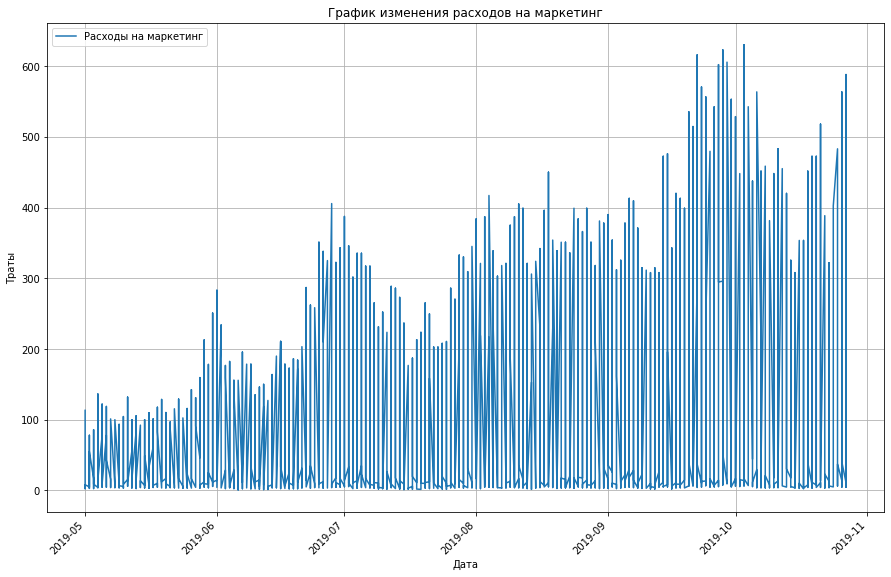

In [36]:
costs.plot(y='costs',
           x='dt',
           figsize=(15, 10),
           grid=True,
           rot=45,        
           label='Расходы на маркетинг',                       
           legend=True) 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Увеличение расходов на маркетинг с течением времени. В конце сентября - начале октября они достигли чуть больше 600 у.е., после чего стали немного снижаться до 400, а затем к концу октября вновь стремились к 600

In [37]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Больше всего трат приходитя на источник `TipTop` (51.9%). Следом идет источник `FaceBoom`(30.75%). Далее идут низкозатратные источники `WahooNetBanner` (4.88%), `AdNonSense` (3.71%), `OppleCreativeMedia` (2.04%). На оставшиеся источники приходится 1-2% трат.

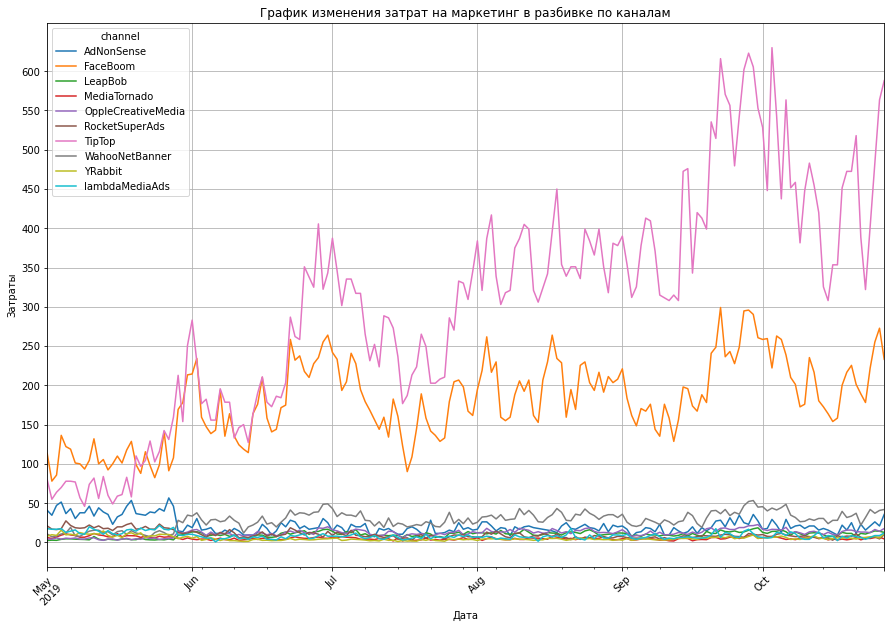

In [38]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(15, 10),
           grid=True,
           rot=45,        
           label='Каналы',                      
           legend=True) 

plt.yticks(np.arange(0, 650, 50))
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

**Выводы:**

* Больше всего трат по двум каналам - `TipTop` и `FaceBoom`.  

* Больше всего трафика закупали у `TipTop` и к октябрю число трат стало чуть больше 600
* Число трат на `FaceBoom` находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник `Tip-Top` возрастают со временем. 

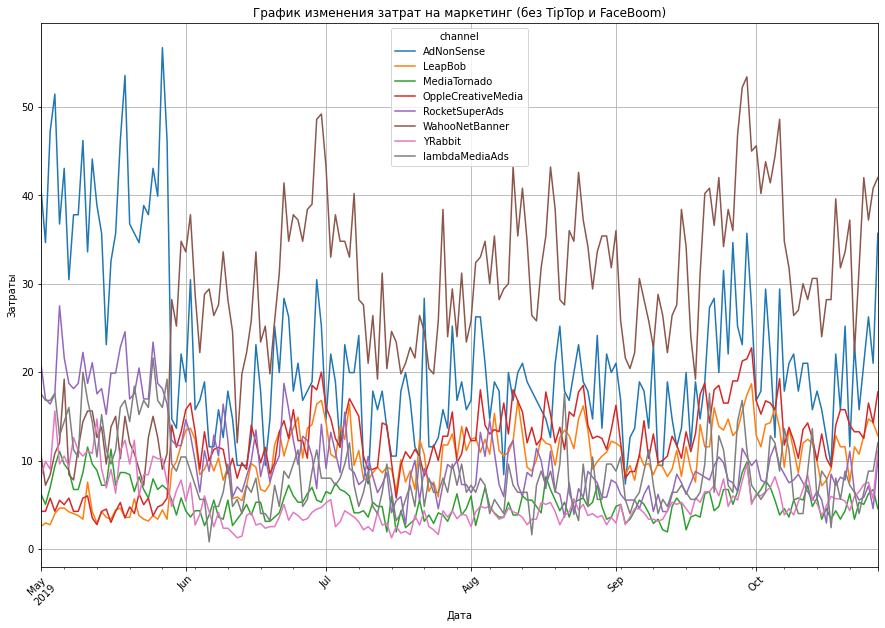

In [39]:
filtered_data2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filtered_data2.plot(                                             
           figsize=(15, 10),
           grid=True,
           rot=45,        
           label='Каналы',                 
           legend=True) 

plt.yticks(np.arange(0,  60, 10))
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Исключая `TipTop` и `FaceBoom` с июня начали расти траты на WahooNetBanner к октябрю их число было в районе 53. 

Затраты на `AdNonSense`, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20.

<a id='part_4.2'></a>
### **Сколько в среднем стоило привлечение одного пользователя из каждого источника**  


Возьмем информацию о стоимости привлечения есть из колонки `acquisition_cost`, таблицы `profiles`. Рассчитаем средний *CAC* на одного пользователя для всего проекта и для каждого источника трафика. Будем использовать профили пользователей.

In [40]:
profiles_analysis = profiles.query('channel != "organic"')
profiles_analysis.describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


Медианная стоимость привлечения одного пользователя - 1.08. При этом среднее находится на значении 1.12. 
Максимальная стоимость привлечения пользователя - 3.71.

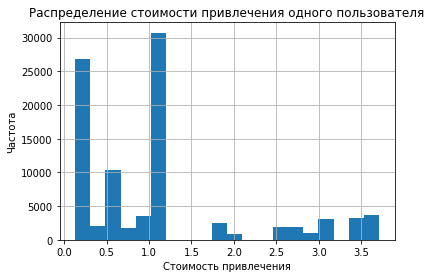

In [41]:
profiles_analysis['acquisition_cost'].hist(bins=20)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

Стандартная стоимость привлечения одного пользователя находится в промежутке от 0 до 1.3.

In [42]:
cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles_analysis.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


* Самый дорогой трафик - `TipTop` (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). 

* Остальные каналы берут за пользователя от 0.21 до 0.72.

<a id='part_4.3'></a>
### Вывод


* Всего на маркетинг потрачено 105497.3

* Увеличение расходов на маркетинг с течением времени. В конце сентября - начале октября они достигли чуть больше 600, после чего стали немного снижаться до 400, а затем к концу октября вновь стремились к 600

* Больше всего трат приходитя на источник `TipTop` (51.9%). Следом идет источник `FaceBoom`(30.75%). Далее идут низкозатратные источники `WahooNetBanner` (4.88%), `AdNonSense` (3.71%), `OppleCreativeMedia` (2.04%). На оставшиеся источники приходится 1-2% трат.

* Больше всего трат по двум каналам это `TipTop` и `FaceBoom`.

* Больше всего трафика закупали у `TipTop` и к октябрю число трат стало чуть больше 600 у.е. Число трат на `FaceBoom` находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник `Tip-Top `возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, тк на этом графике данные по ним недостаточно показательны.

Исключая `TipTop` и `FaceBoom` с июня начали расти траты на `WahooNetBanner` к октябрю их число было в районе 53. Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20.

* Выяснено, сколько в среднем стоило привлечение одного пользователя из каждого источника.

Рассчитан средний *CAC* на одного пользователя для всего проекта и для каждого источника трафика. Медианная стоимость привлечения одного пользователя - 1.08. При этом среднее находится на значении 1.12 Медиана и средняя находятся почти на одном уровне, это означает, что резких выбросов у нас нет ( потому что убрали органический трафик ). Максимальная стоимость привлечения пользователя - 3.71.


* Самый дорогой трафик - `TipTop` (средняя стоимость - 2.80 за пользователя), далее идет `FaceBoom` и `AdNonSense` примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

<a id='part_5'></a>
# Шаг 5. Оценим окупаемость рекламы


С помощью LTV и ROI:

- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые обнаружили. Ответим на вопросы:

- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что смотрим данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

<a id='part_5.1'></a>
**Проанализируем общую окупаемость рекламы.**  


* Моментом анализа будет являться 01.11.2019.

* Горизонтом анализа будет являться - 14 дней.

In [43]:
import time
from datetime import datetime
from datetime import date, timedelta as td

# момент анализа 
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа 
horizon_days = 14

Оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

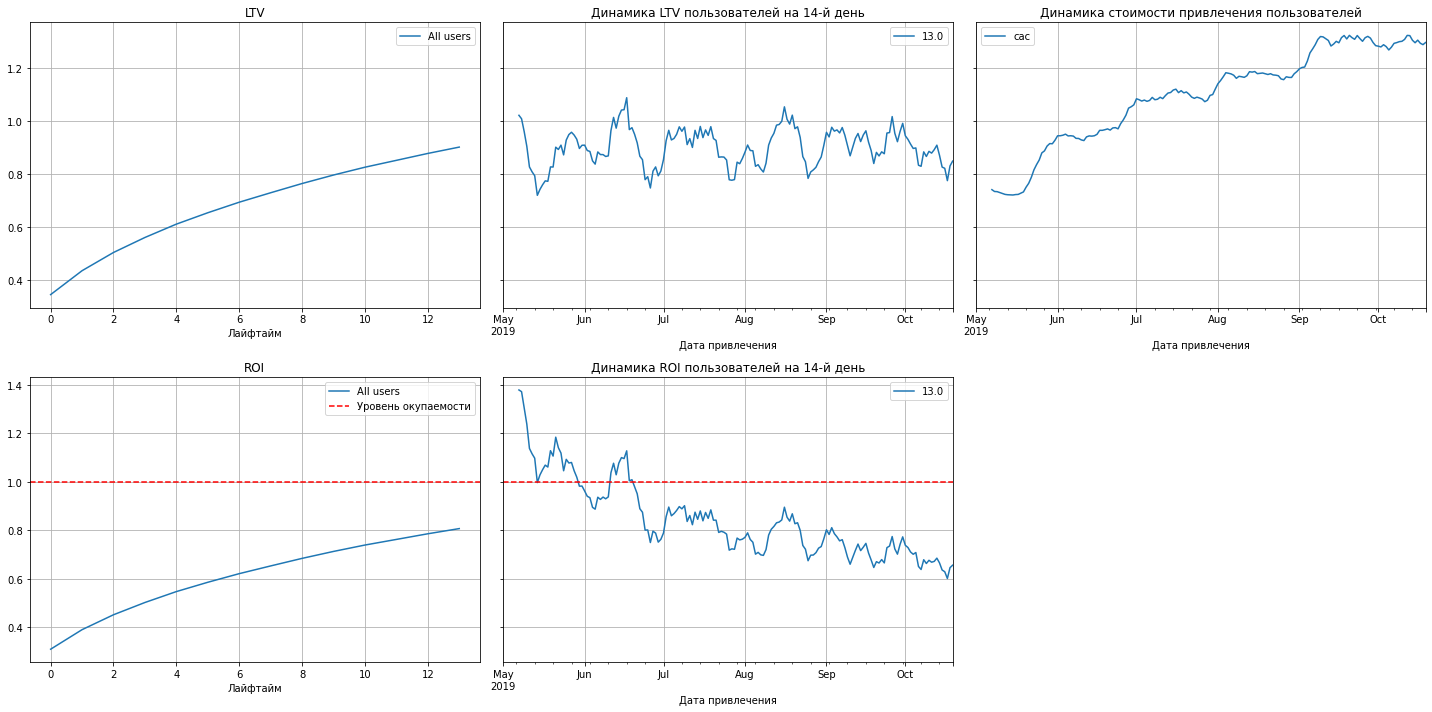

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_analysis, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:**
* ROI к концу второй недели доходит до 80%, то есть пользователи не окупаются.
* CAC стабильно растёт.
* LTV  достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
* ROI пользователей неумолимо падает. В июня показатель стал резко падать, а потом и вовсе перестал окупаться.

<a id='part_5.2'></a>
**Проанализируем окупаемость рекламы с разбивкой по устройствам**  


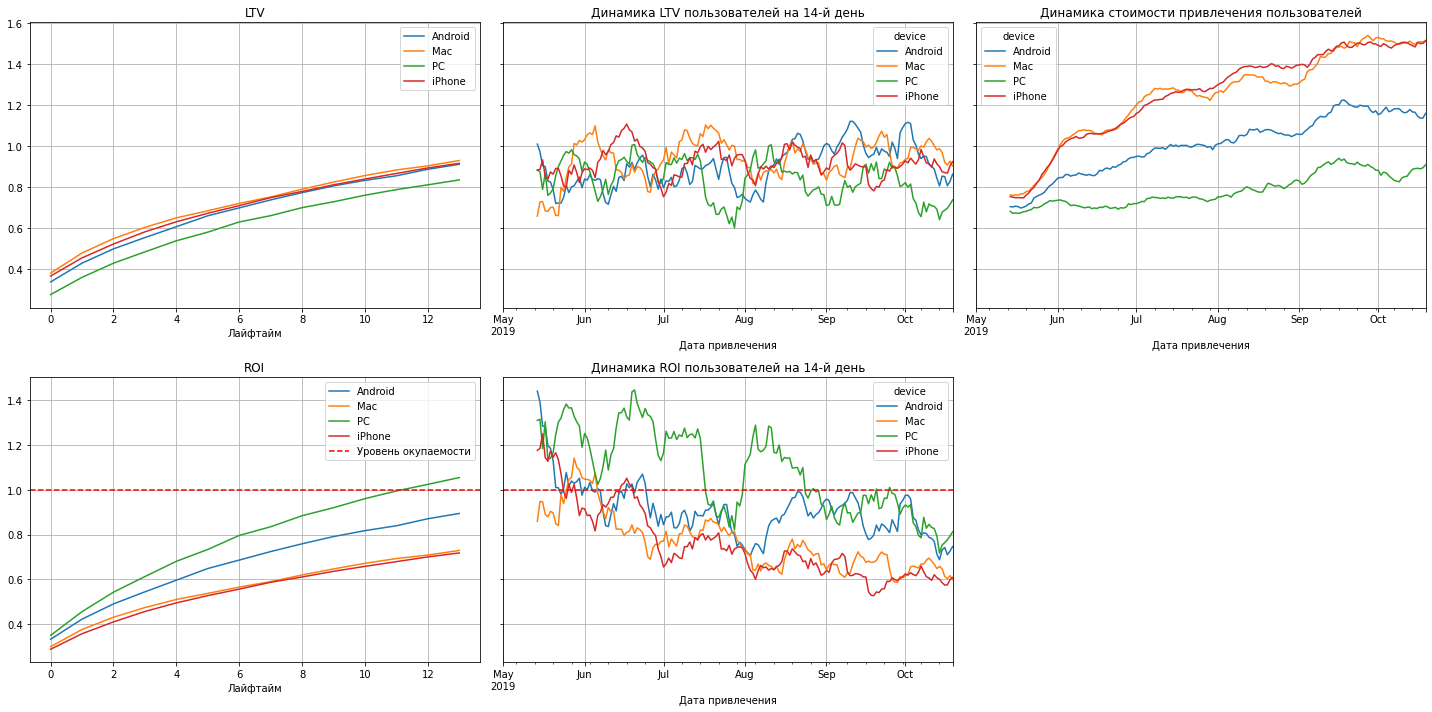

In [45]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_analysis, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

* Пользователи всех устройств окупались до июня, а потом что-то пошло не так и остались окупаться только пользователи PC.
* В сентябре(и какое-то время в августе) ROI пользователей PC 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня. 
* LTV пользователей всё так же стабилен. Стоимость привлечения пользователей PC и Android самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.
* За весь лайфтайм только пользователи PC достигли уровня окупаемости.

Внимание стоит обратить на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает

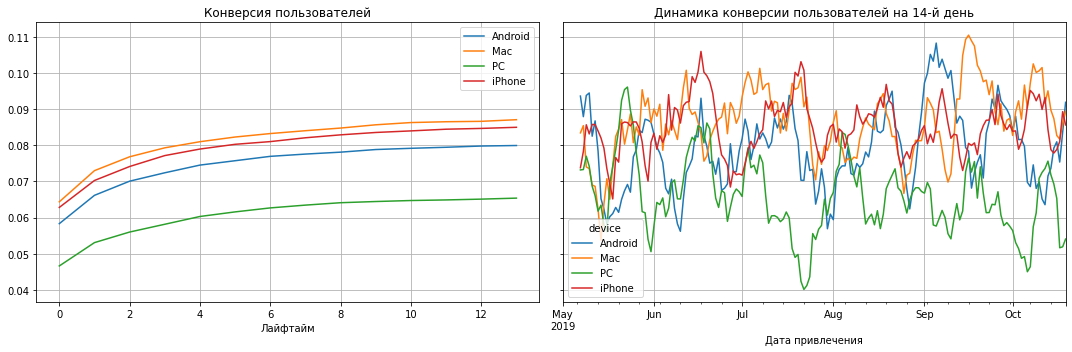

In [46]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_analysis, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, Android и iPhone конвертируются хорошо. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

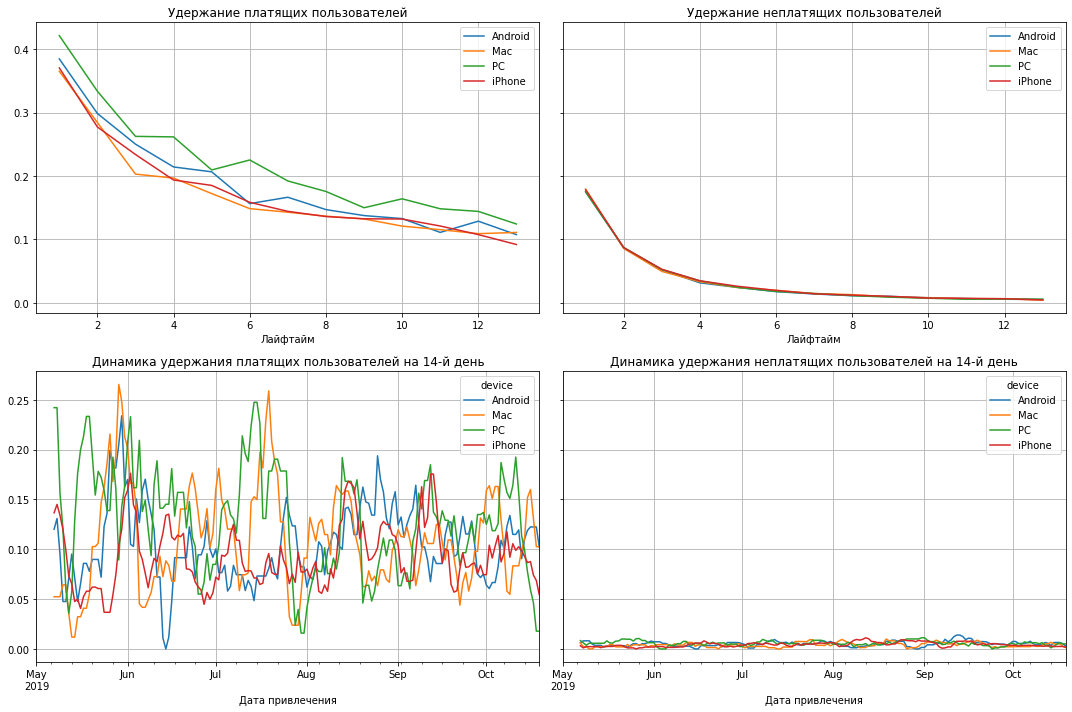

In [47]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_analysis, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Android.

<a id='part_5.3'></a>
**Проанализируем окупаемость рекламы с разбивкой по странам**  


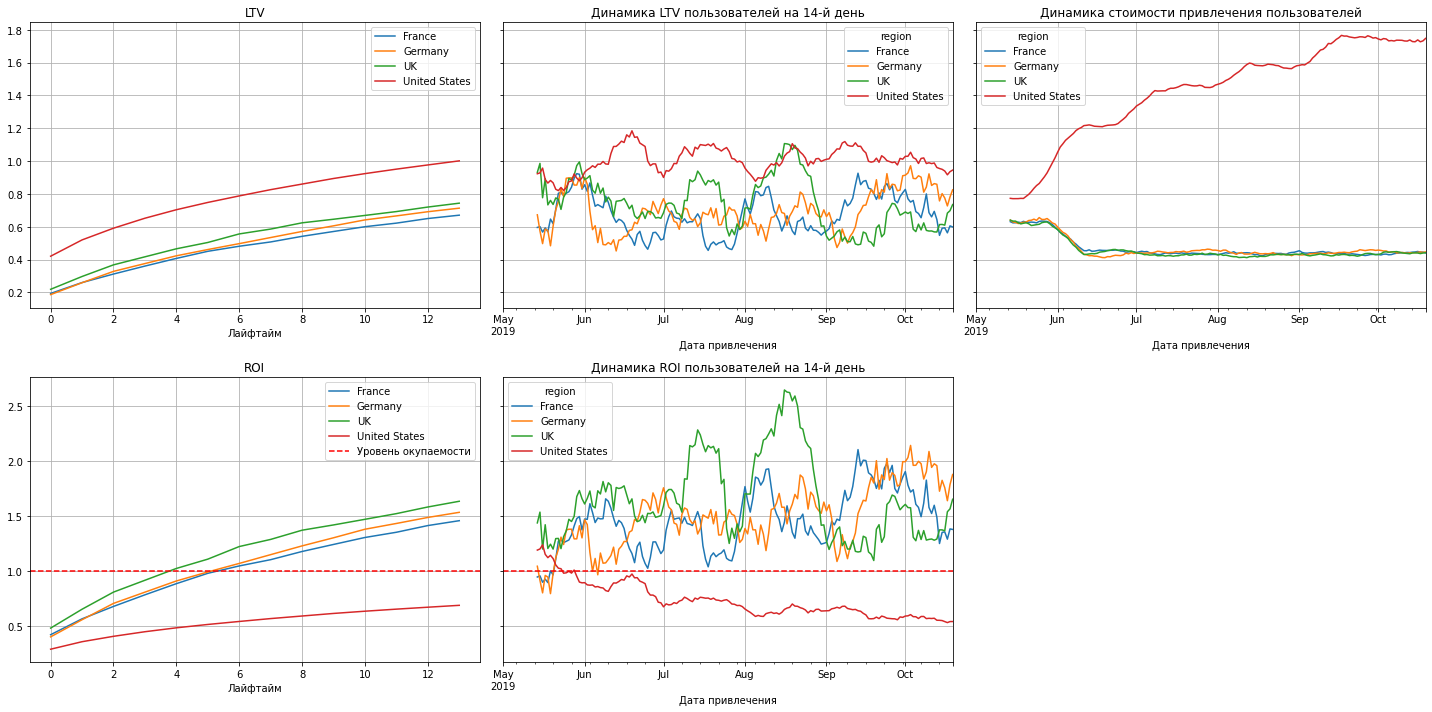

In [48]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_analysis, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
* Реклама окупается не везде. В США уровень окупаемости рекламы низкий.
* При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
* LTV всё так же стабилен.
* Лучше всего окупается Великобритании и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. 

 
Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

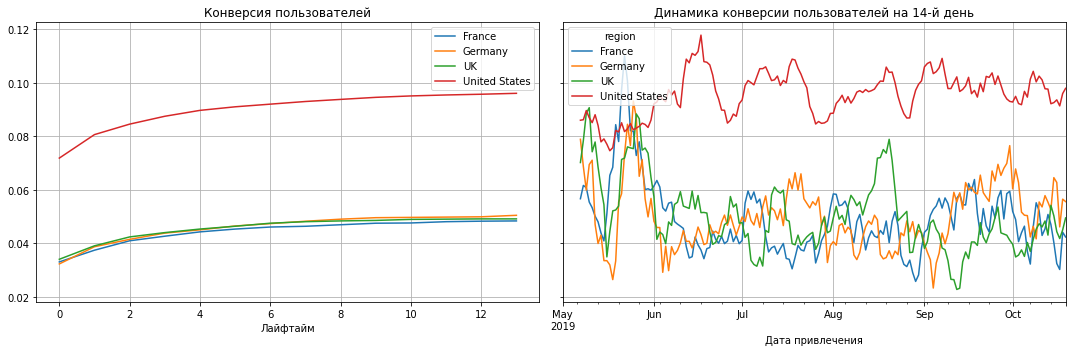

In [49]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_analysis, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Слабая конверсия у пользователей из Великобритании, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

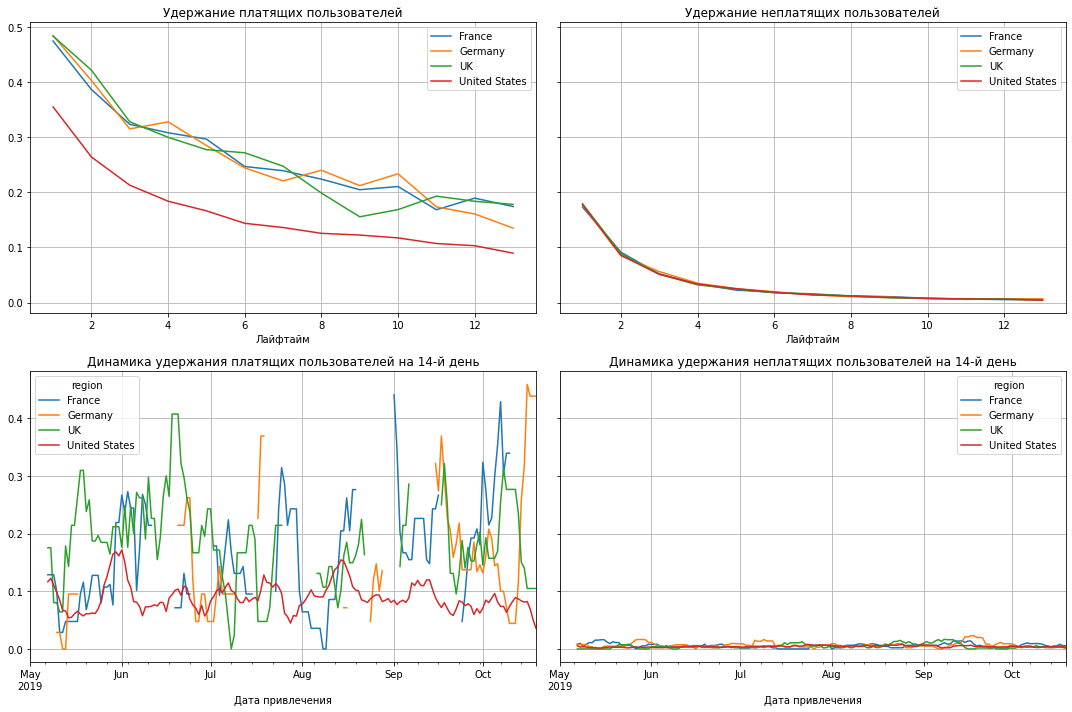

In [50]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_analysis, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США явно плохо удерживаются.

<a id='part_5.4'></a>
**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам**  


Проверим каналы. Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

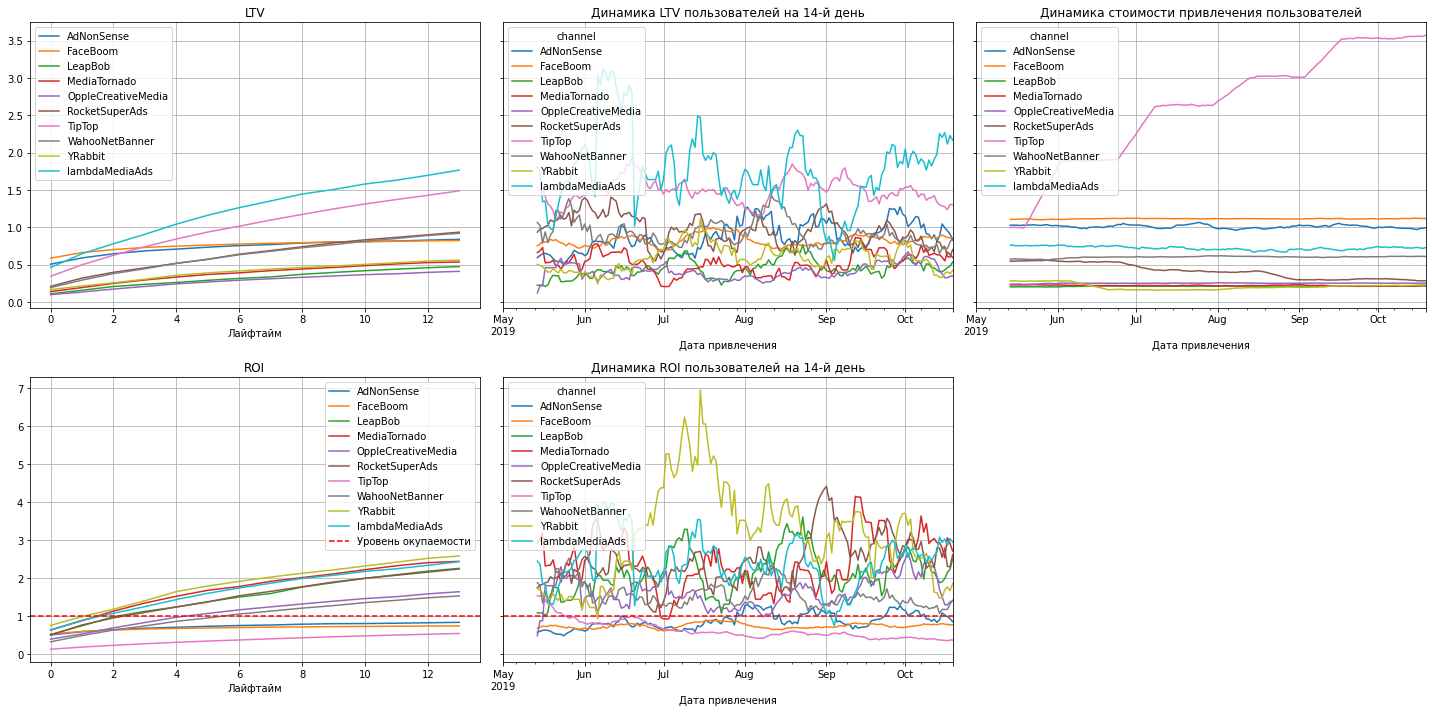

In [51]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_analysis, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
*  Видим большой рост стоимости привлечения пользователей из рекламного канала `TipTop`. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось.
* Не окупаются пользователи, привлеченные из каналов `LeapBop`, `FaceBoom`, `TipTop`.
* Хорошо показала себя рекламная сеть `YRabbit` в июле - ROI пользователей на 14 день был высок.

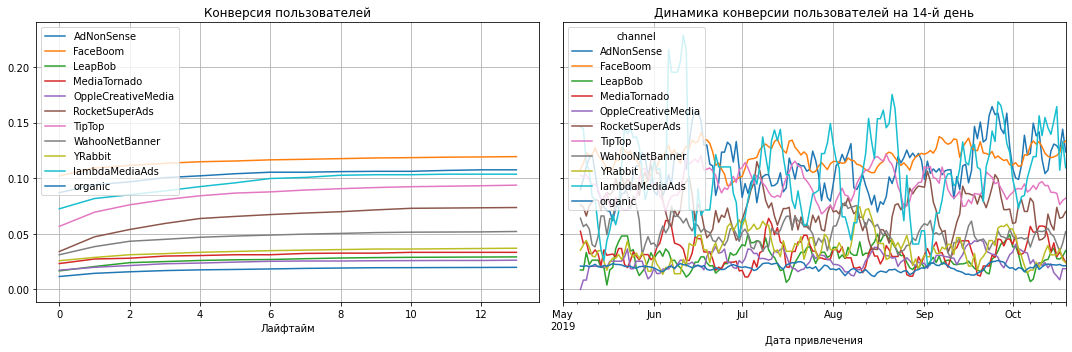

In [52]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Плохо конвертируются пользователи из каналов `RocketSuperAds`, `MediaTornado`, `YRabbit`.

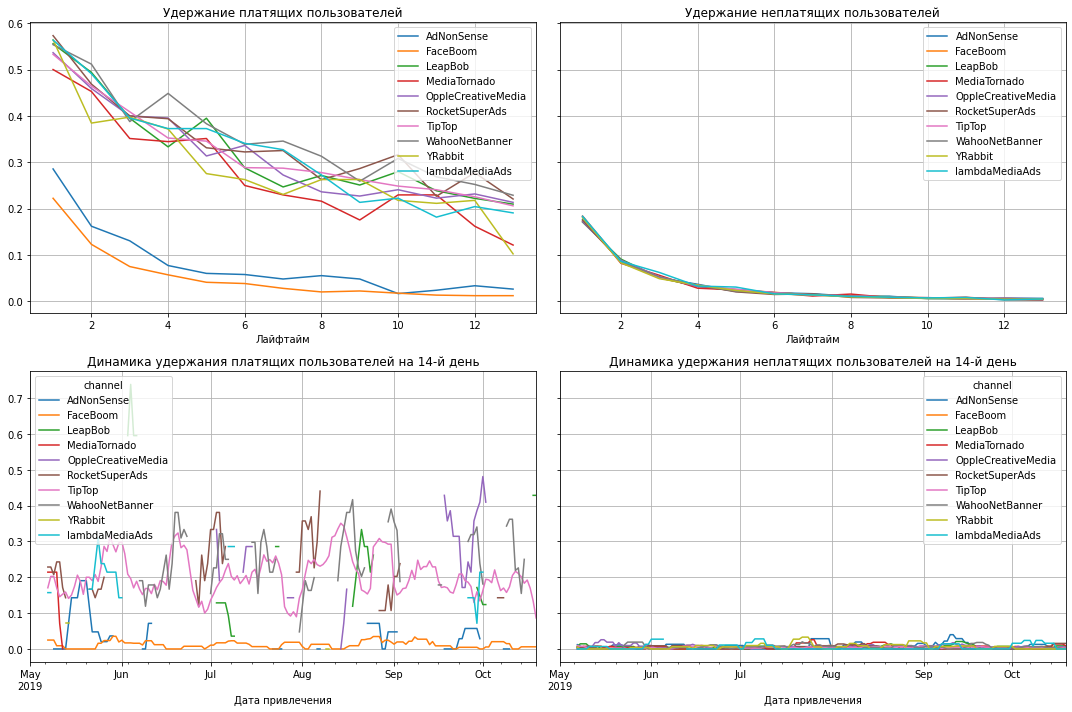

In [53]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_analysis, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим явных аутсайдеров - плохо удерживаются пользователи из каналов `FaceBoom` и `AdNonSense`.

<a id='part_5.5'></a>
# Вывод


В целом, реклама близка к окупемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

* Реклама почти окупается к концу 2й недели. ROI — примерно 80%

* Окупаемость могут снижать владельцы Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов `LeapBop`, `FaceBoom`, `TipTop`.

* Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

<a id='part_6'></a>
# Шаг 6. Общий вывод



<a id='part_6.1'></a>
**Причины неэффективности привлечения пользователей**  


Анализ рентабельности рекламы, визуализация LTV и ROI.  
По графикам сделаны следующие выводы:

**Окупаемость рекламы:**
* Реклама окупает себя только на 80% к концу второй недели.

* ROI пользователей постоянно падает.

**Окупаемость рекламы с делением по устройствам:**
* Пользователи Iphone, Mac, Android окупались до июня, потом резко пошли на спад.

* Стоимость привлечения пользователей в июне так же выросла.

* Стоимость привлечения владельцев Mac и IPhone является самой высокой, но при этом окупаемость является самой низкой.


**Конверсия и удержание:**

* Конверсия в целом стабильная.

* В удержании выделяются только пользователи PC, которые удерживаются лучше всех.

* Неплатящие пользователи стабильно удерживаются плохо.

**Окупаемость рекламы по странам:**

* Самый низкий уровень окупаемости у США ( стоимость привлечения пользователей из США - самая высокая) 

* Лучше всего окупается Великобритании и Германия. 

**Конверсия по странам:**

* Низкая конверсия у пользователей из Германии, Великобритании и Франции.

* США конвентируется лучше всех, но удерживается хуже всех.

**Окупаемость рекламы с разбивкой по рекламным каналам:**

* `TipTop` имеет самую большую стоимость привлечения, но так же имеет самую низкую динамику окупаемости.

* Не окупаются пользователи `LeapBop`, `FaceBoom`, `TipTop`. 

* Рекламная сеть `YRabbit` имеет самую лучшую динамику и имеет при этом самую низкую стоимость привлечения.

* Хуже всего удерживаются пользователи `FaceBoom` и `AdNonSense`

<a id='part_6.2'></a>
**Рекомендации для отдела маркетинга для повышения эффективности**  


* Снизить рост стоимости канала `TipTop`, поскольку привлечение пользователей из этого рекламного канала обходится дорого, а обратного эффекта и окупаемости мы не получаем. Мы бы посоветовали вложить большее количество средств в рекламную сеть `YRabbit`, которая приносит самую высокую окупаемость и обладает самой низкой стоимостью привлечения.

* Владельцы устройств Mac и IPhone так же привлекаются намного дороже чем все остальные устройства, но их окупаемость оставляет желать лучшего. Нужно проверить почему пользователи этих устройств пользуется менее охотнее, чем все остальные, может быть дело в всплывающих уведомлениях или роботоспособности устройства.

* Очень низкий уровень окупаемости пользователей из США, хотя пользователей из США больше всех. Нужно улучшить распределение затрат на привлечение пользователей из США.

* Окупаемость начала резко падать после наступления лета, нужно проверить причины такого падения, а так же выпускаемые обновления на период май-июнь, может быть некоторые из них замедлили работу приложения, либо как-то исказили пользовательских опыт.